In [ ]:
#Retirando dados do csv
import pandas as pd

file_path = 'COLOQUE O CAMINHO DO CSV ANTIGO'
data = pd.read_csv(file_path)

data = data[data['COLUNA'] != 'DADO PARA RETIRAR']

new_file_path = 'COLOQUE O CAMINHO DO CSV NOVO'
data.to_csv(new_file_path, index=False)

In [1]:
#Leitura do CSV
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Data/Sleep_health_and_lifestyle.csv'
dataBase = pd.read_csv(file_path)

dataBase.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,none
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


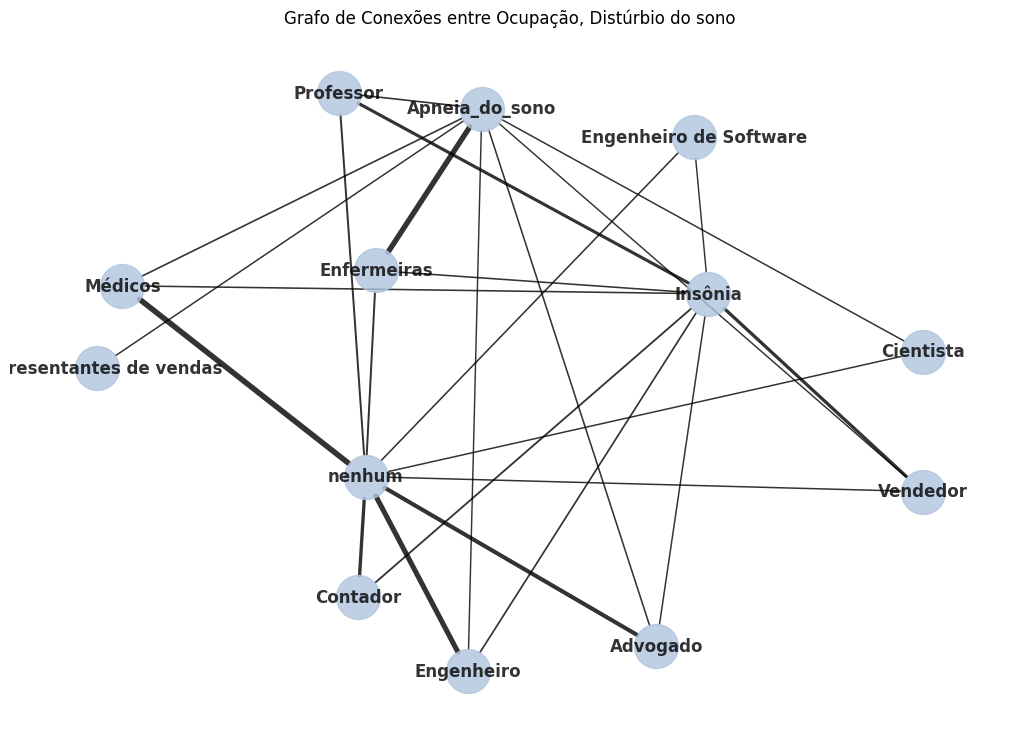

In [21]:
#Grafo de ocupação com disturbio do sono para perceber relações
grafoDeAnalise = nx.Graph()

grafoDeAnalise.add_nodes_from(dataBase['Occupation'])
grafoDeAnalise.add_nodes_from(dataBase['Sleep Disorder'])

ContaConexões = {}
for edge in zip(dataBase['Occupation'], dataBase['Sleep Disorder']):
    ContaConexões[edge] = ContaConexões.get(edge, 0) + 1

for edge, count in ContaConexões.items():
    grafoDeAnalise.add_edge(edge[0], edge[1], weight=count)

edge_weights = [grafoDeAnalise[u][v]['weight'] for u, v in grafoDeAnalise.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(10, 7))
pos = nx.fruchterman_reingold_layout(grafoDeAnalise, k=5)
nx.draw(grafoDeAnalise, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8,width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoDeAnalise, 'weight')
#nx.draw_networkx_edge_labels(grafoNivelDeEstesse, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Ocupação, Distúrbio do sono')
plt.show()


In [22]:
#Funções de pesos de arestas
def add_edges_with_weights(grafoBase, edges):
    countPeople = {}
    for edge in edges:
        countPeople[edge] = countPeople.get(edge, 0) + 1

    for edge, count in countPeople.items():
        grafoBase.add_edge(edge[0], edge[1], weight=count)

def calculate_edge_widths(grafoBase):
    edge_weights = [grafoBase[u][v]['weight'] for u, v in grafoBase.edges()]
    max_weight = max(edge_weights)
    edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]
    return edge_widths

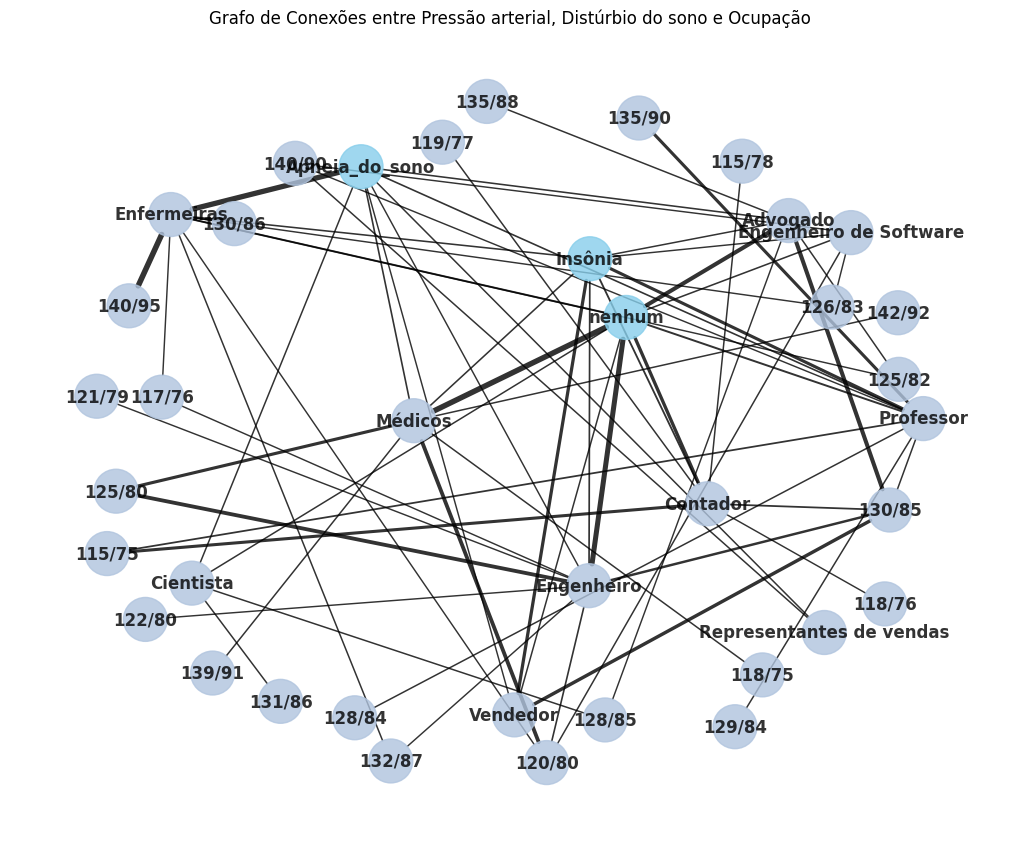

In [30]:
#Ocupação conectados com disturbios e pressão
grafoBase = nx.Graph()

edges = list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))
edges += list(zip(dataBase['Occupation'], dataBase['Blood Pressure']))

grafoBase.add_nodes_from(dataBase['Occupation'])
grafoBase.add_nodes_from(dataBase['Sleep Disorder'])
grafoBase.add_nodes_from(dataBase['Blood Pressure'])

add_edges_with_weights(grafoBase, edges)
edge_widths = calculate_edge_widths(grafoBase)

plt.figure(figsize=(10, 8))
pos = nx.fruchterman_reingold_layout(grafoBase, k=5)
node_colors= ['skyblue' if node in ['Insônia', 'Apneia_do_sono', 'nenhum'] else 'lightsteelblue' for node in grafoBase.nodes()]
nx.draw(grafoBase, pos, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=12, alpha=0.8, width=edge_widths, edge_color='black', arrows=True)
plt.title('Grafo de Conexões entre Pressão arterial, Distúrbio do sono e Ocupação')
plt.show()


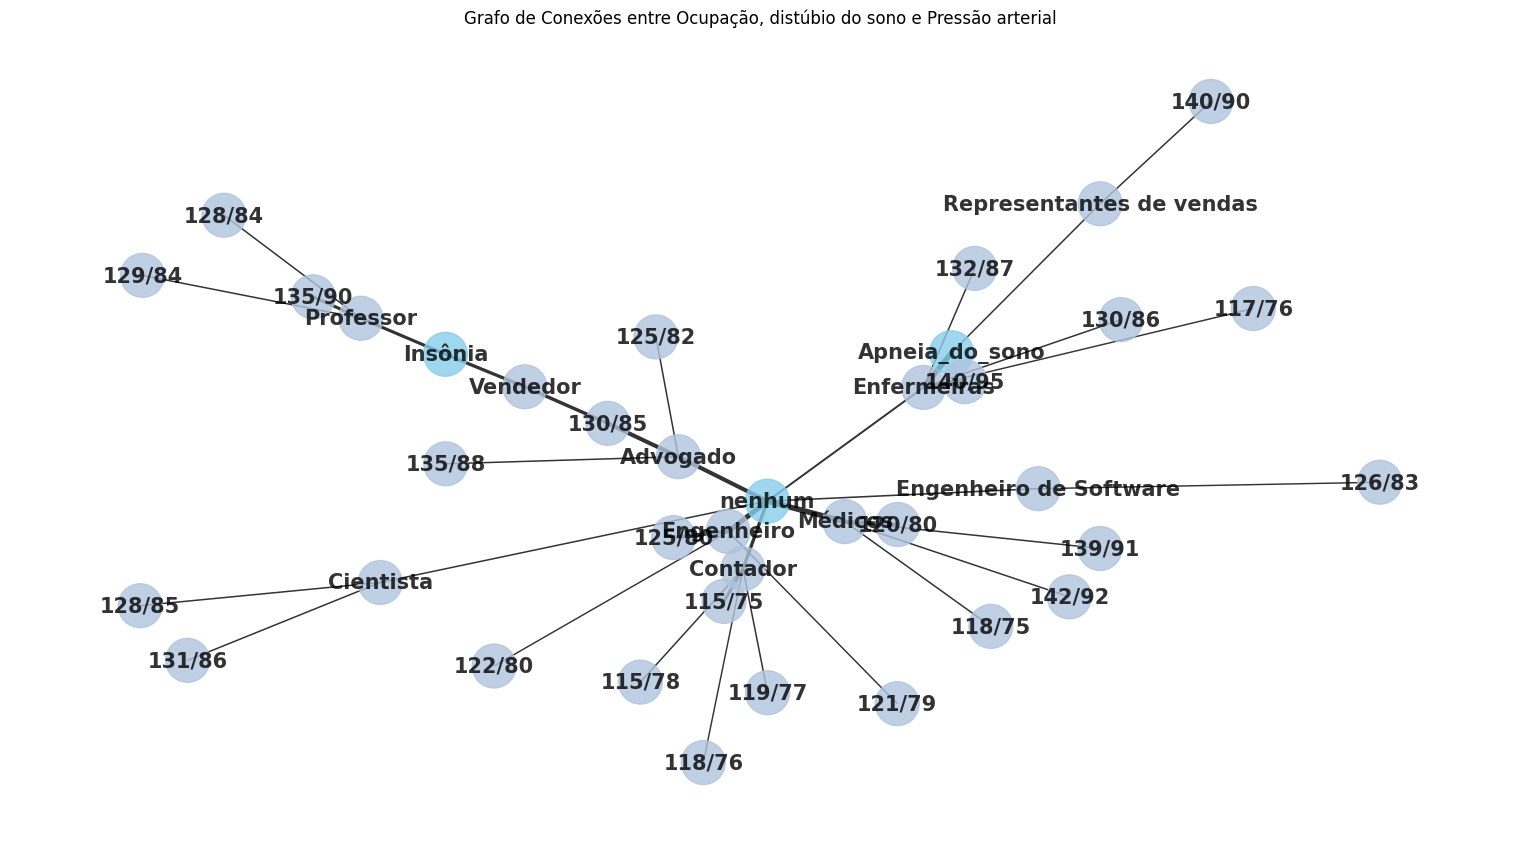

In [37]:
# Árvore de abragência máxima 1 
grafoBase = nx.Graph()

edges = list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))
edges += list(zip(dataBase['Occupation'], dataBase['Blood Pressure']))

grafoBase.add_nodes_from(dataBase['Occupation'])
grafoBase.add_nodes_from(dataBase['Sleep Disorder'])
grafoBase.add_nodes_from(dataBase['Blood Pressure'])

add_edges_with_weights(grafoBase, edges)

# Criação da árvore maxima de abrangência
treeGeral = nx.maximum_spanning_tree(grafoBase, weight='weight', algorithm='kruskal')

edge_widths = calculate_edge_widths(treeGeral)

node_colors= ['skyblue' if node in ['Insônia', 'Apneia_do_sono', 'nenhum'] else 'lightsteelblue' for node in treeGeral.nodes()]
plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(treeGeral, k=7)
nx.draw(treeGeral, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Ocupação, distúbio do sono e Pressão arterial')
plt.show()


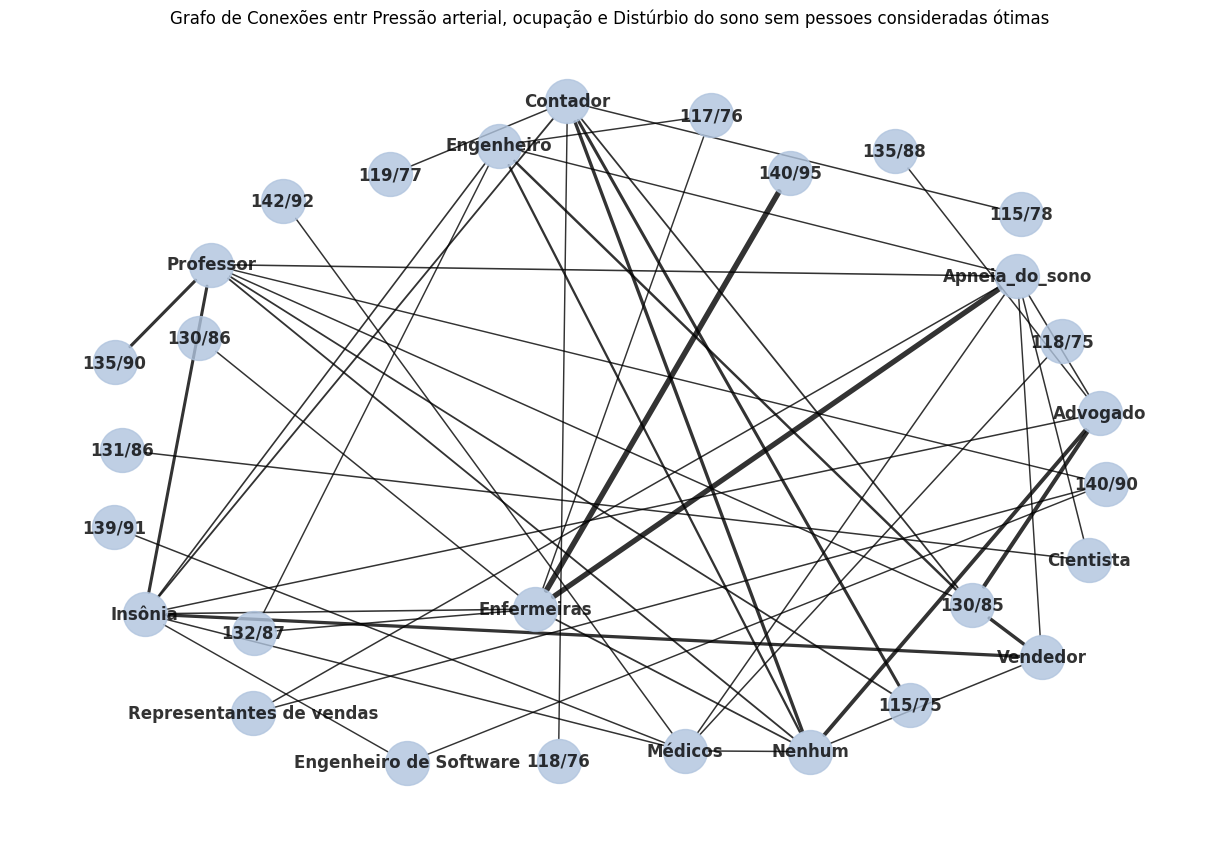

In [38]:
#Grafo sem pressão 120/80
file_path = 'Data/SemPressaoNormal.csv'
SemPressaoPadrao = pd.read_csv(file_path)
grafoSemPressaoNormal = nx.Graph()

edges = list(zip(SemPressaoPadrao['Occupation'], SemPressaoPadrao['Sleep Disorder']))
edges += list(zip(SemPressaoPadrao['Occupation'], SemPressaoPadrao['Blood Pressure']))

grafoSemPressaoNormal.add_nodes_from(SemPressaoPadrao['Occupation'])
grafoSemPressaoNormal.add_nodes_from(SemPressaoPadrao['Sleep Disorder'])
grafoSemPressaoNormal.add_nodes_from(SemPressaoPadrao['Blood Pressure'])

add_edges_with_weights(grafoSemPressaoNormal, edges)
edge_widths = calculate_edge_widths(grafoSemPressaoNormal)

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(grafoSemPressaoNormal, k=10)
nx.draw(grafoSemPressaoNormal, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8, width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoNivelDeEstesse, 'weight')
#nx.draw_networkx_edge_labels(grafoNivelDeEstesse, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entr Pressão arterial, ocupação e Distúrbio do sono sem pessoes consideradas ótimas')
plt.show()


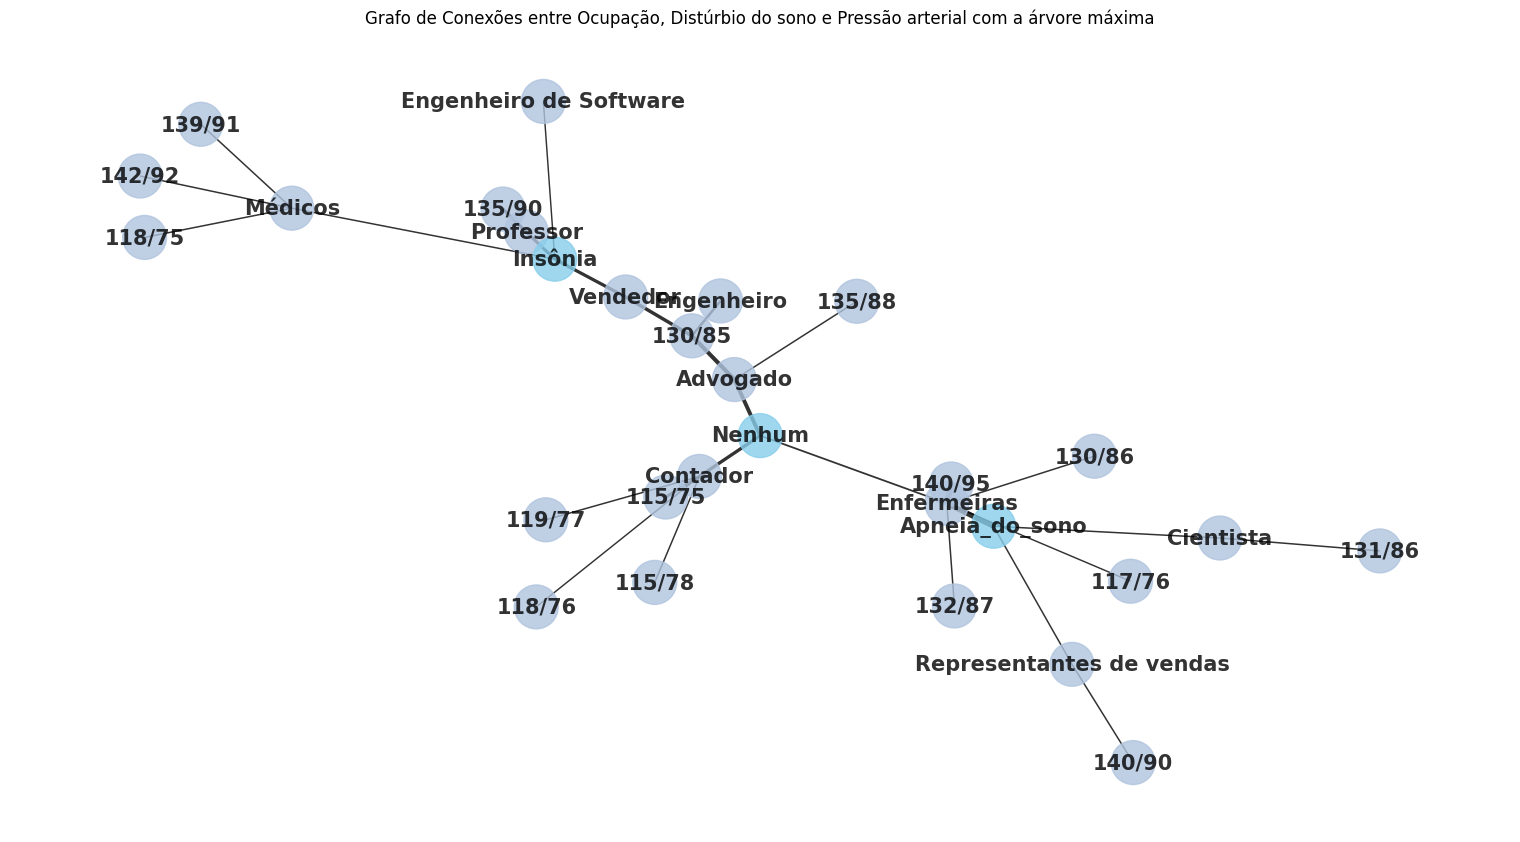

In [55]:
#árvore de abgrangência máxima sem pressoes 120/80
grafoSemPressaoNormalMST = nx.Graph()

edges = list(zip(SemPressaoPadrao ['Occupation'], SemPressaoPadrao ['Sleep Disorder']))
edges += list(zip(SemPressaoPadrao ['Occupation'], SemPressaoPadrao ['Blood Pressure']))

grafoSemPressaoNormalMST.add_nodes_from(SemPressaoPadrao ['Occupation'])
grafoSemPressaoNormalMST.add_nodes_from(SemPressaoPadrao ['Sleep Disorder'])
grafoSemPressaoNormalMST.add_nodes_from(SemPressaoPadrao ['Blood Pressure'])

add_edges_with_weights(grafoSemPressaoNormalMST, edges)

tree = nx.maximum_spanning_tree(grafoSemPressaoNormalMST,weight='weight', algorithm='kruskal')

edge_widths = edge_widths = calculate_edge_widths(tree)

plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(tree, k=5)

node_colors= ['skyblue' if node in ['Insônia', 'Apneia_do_sono', 'Nenhum'] else 'lightsteelblue' for node in tree.nodes()]
nx.draw(tree, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Ocupação, Distúrbio do sono e Pressão arterial com a árvore máxima')
plt.show()


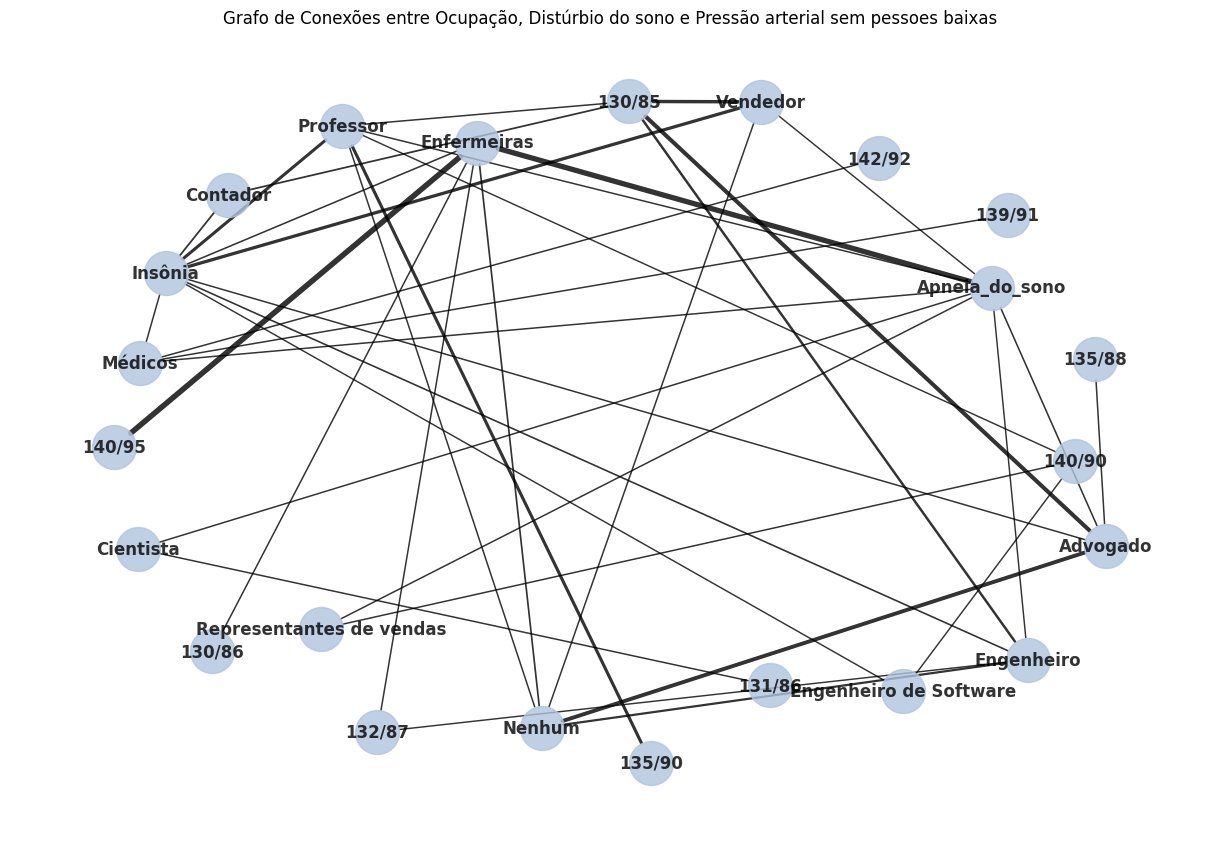

In [46]:
#Grafo sem as pressoes baixas
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Data/SemPressaoBaixa.csv'
SemPressaoBaixa = pd.read_csv(file_path)
grafoSemPressaoBaixa = nx.Graph()

edges = list(zip(SemPressaoBaixa['Occupation'], SemPressaoBaixa['Sleep Disorder']))
edges += list(zip(SemPressaoBaixa['Occupation'], SemPressaoBaixa['Blood Pressure']))

grafoSemPressaoBaixa.add_nodes_from(SemPressaoBaixa['Occupation'])
grafoSemPressaoBaixa.add_nodes_from(SemPressaoBaixa['Sleep Disorder'])
grafoSemPressaoBaixa.add_nodes_from(SemPressaoBaixa['Blood Pressure'])

add_edges_with_weights(grafoSemPressaoBaixa, edges)
edge_widths = calculate_edge_widths(grafoSemPressaoBaixa)

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(grafoSemPressaoBaixa, k=10)
nx.draw(grafoSemPressaoBaixa, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8,width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoSemPressaoBaixa, 'weight')
#nx.draw_networkx_edge_labels(grafoSemPressaoBaixa, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Ocupação, Distúrbio do sono e Pressão arterial sem pessoes baixas')
plt.show()


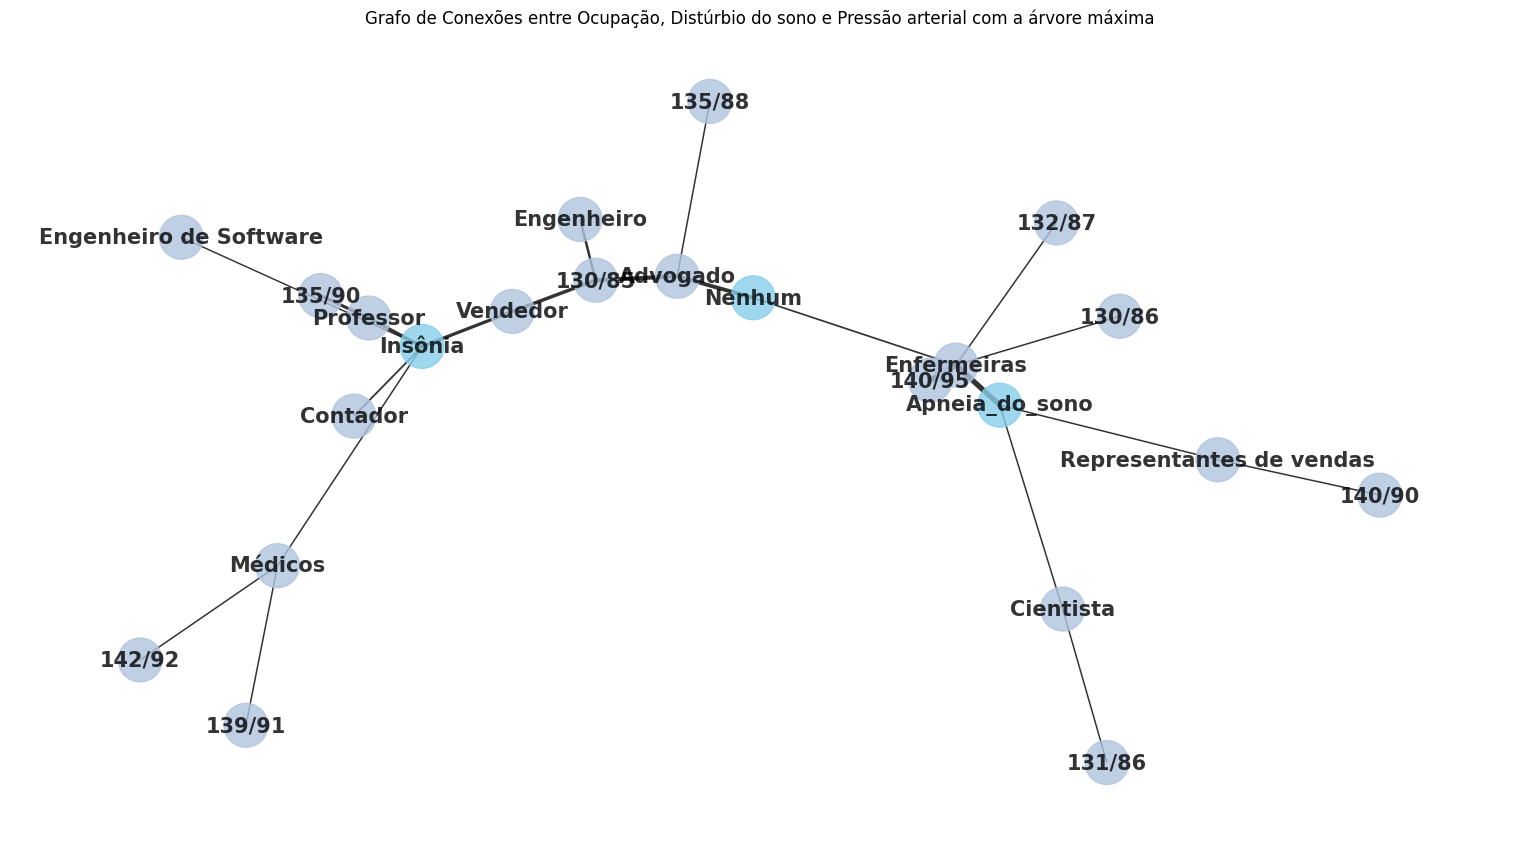

In [53]:
#Árvore de abrangência máxima sem pressoes baixas
grafoSemPressaoBaixaMST = nx.Graph()

edges = list(zip(SemPressaoBaixa ['Occupation'], SemPressaoBaixa ['Sleep Disorder']))
edges += list(zip(SemPressaoBaixa ['Occupation'], SemPressaoBaixa ['Blood Pressure']))

grafoSemPressaoBaixaMST.add_nodes_from(SemPressaoBaixa ['Occupation'])
grafoSemPressaoBaixaMST.add_nodes_from(SemPressaoBaixa ['Sleep Disorder'])
grafoSemPressaoBaixaMST.add_nodes_from(SemPressaoBaixa ['Blood Pressure'])


add_edges_with_weights(grafoSemPressaoBaixaMST, edges)

tree = nx.maximum_spanning_tree(grafoSemPressaoBaixaMST,weight='weight', algorithm='kruskal')

edge_widths = calculate_edge_widths(tree)

plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(tree, k=7)
node_colors= ['skyblue' if node in ['Insônia', 'Apneia_do_sono', 'Nenhum'] else 'lightsteelblue' for node in tree.nodes()]
nx.draw(tree, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Ocupação, Distúrbio do sono e Pressão arterial com a árvore máxima')
plt.show()


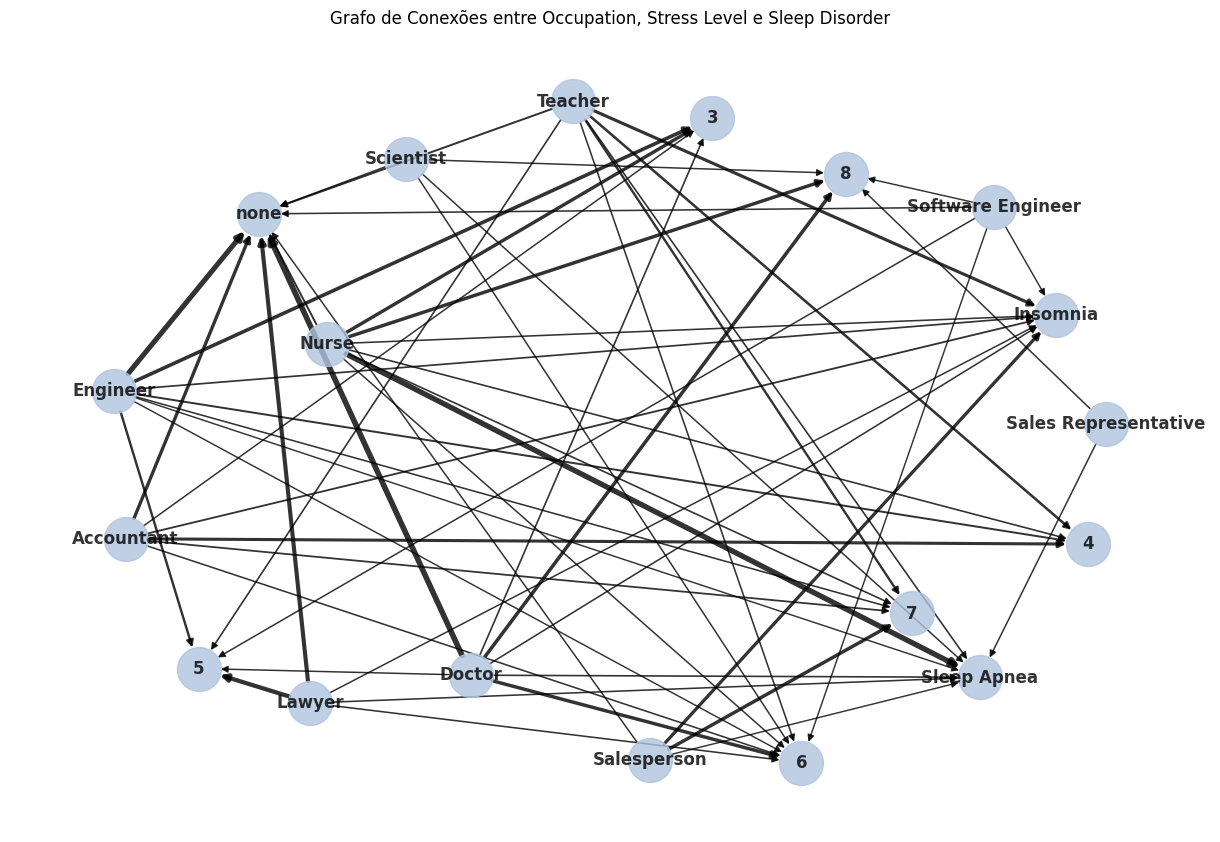

In [9]:
#Grafo de ocupação, nível de estresse e disturbio
grafoNivelDeEstesse = nx.DiGraph()

grafoNivelDeEstesse.add_nodes_from(dataBase['Occupation'])
grafoNivelDeEstesse.add_nodes_from(dataBase['Stress Level'])
grafoNivelDeEstesse.add_nodes_from(dataBase['Sleep Disorder'])

edges = list(zip(dataBase ['Occupation'], dataBase ['Sleep Disorder']))
edges += list(zip(dataBase ['Occupation'], dataBase ['Stress Level']))

add_edges_with_weights(grafoNivelDeEstesse, edges)
edge_widths = calculate_edge_widths(grafoNivelDeEstesse)

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(grafoNivelDeEstesse, k=8)
nx.draw(grafoNivelDeEstesse, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8, width=edge_widths,edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoNivelDeEstesse, 'weight')
#nx.draw_networkx_edge_labels(grafoNivelDeEstesse, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Occupation, Stress Level e Sleep Disorder')
plt.show()


<Figure size 1000x700 with 0 Axes>

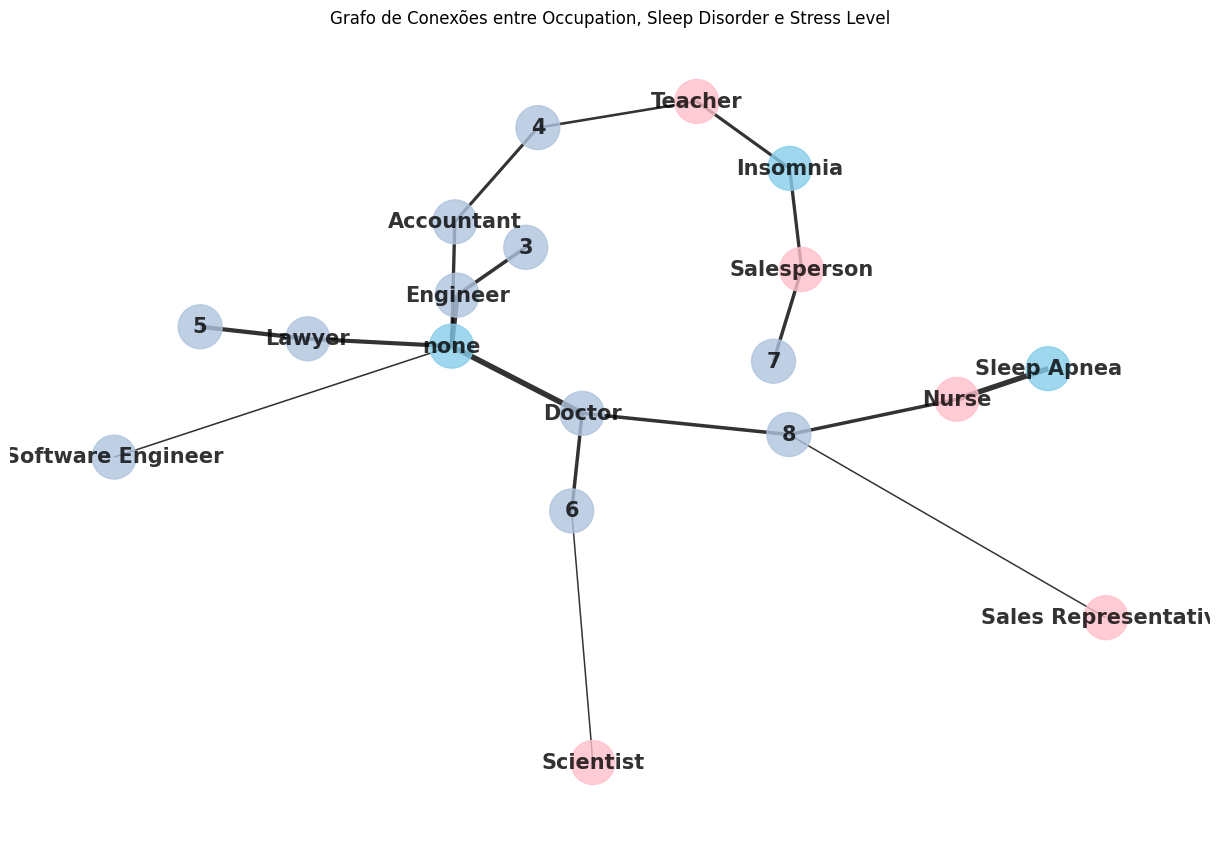

In [10]:
#Grafo da árvores maxima de ocupação, estresse e disturbio
grafoNivelDeEstesseMST = nx.Graph()

edges = list(zip(dataBase['Occupation'], dataBase['Stress Level']))
edges += list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))

grafoNivelDeEstesseMST.add_nodes_from(dataBase['Stress Level'])
grafoNivelDeEstesseMST.add_nodes_from(dataBase['Occupation'])
grafoNivelDeEstesseMST.add_nodes_from(dataBase['Sleep Disorder'])

add_edges_with_weights(grafoNivelDeEstesseMST, edges)


tree = nx.maximum_spanning_tree(grafoNivelDeEstesseMST, weight='weight',algorithm='kruskal')

edge_widths = calculate_edge_widths(tree)

plt.figure(figsize=(10, 7))

node_colors = []

for node in grafoNivelDeEstesseMST.nodes():
    if node in ['Nurse', 'Teacher', 'Salesperson', 'Sales Representative', 'Scientist']:
        node_colors.append('pink')
    elif node in ['Insomnia', 'Sleep Apnea', 'none']:
        node_colors.append('skyblue')
    else:
        node_colors.append('lightsteelblue')

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(tree, k=1)
nx.draw(tree, pos, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Stress Level')
plt.show()


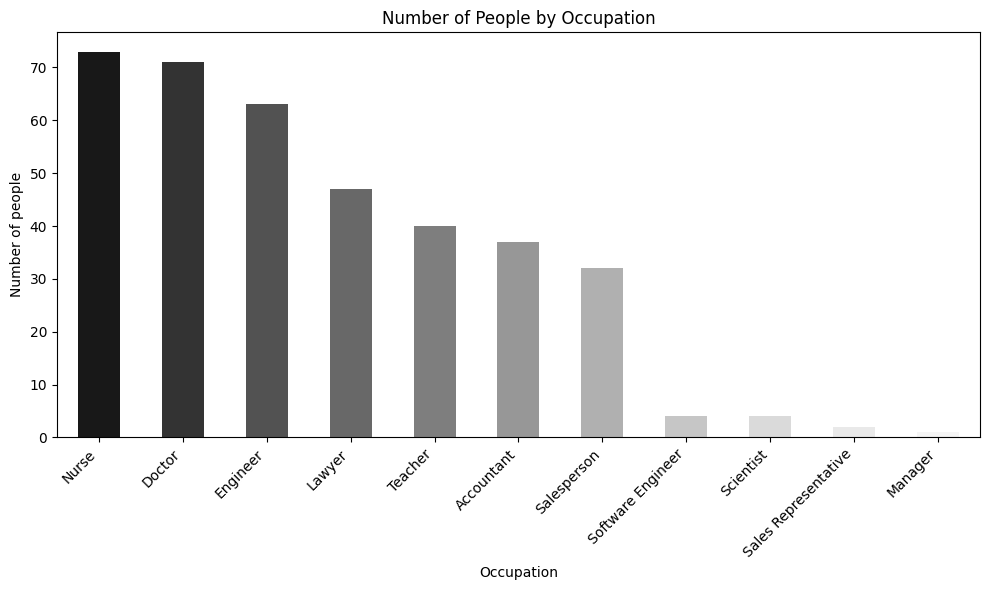

In [24]:
#instalar pip install seaborn
import seaborn as sns

df_qtdOcupacao = pd.read_csv('./Data/dadosOriginais.csv')

ocupacao_counts = df_qtdOcupacao['Occupation'].value_counts()

cores = sns.color_palette("Greys_r", len(ocupacao_counts))

plt.figure(figsize=(10, 6))
ocupacao_counts.plot(kind='bar', color=cores)
plt.title('Number of People by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


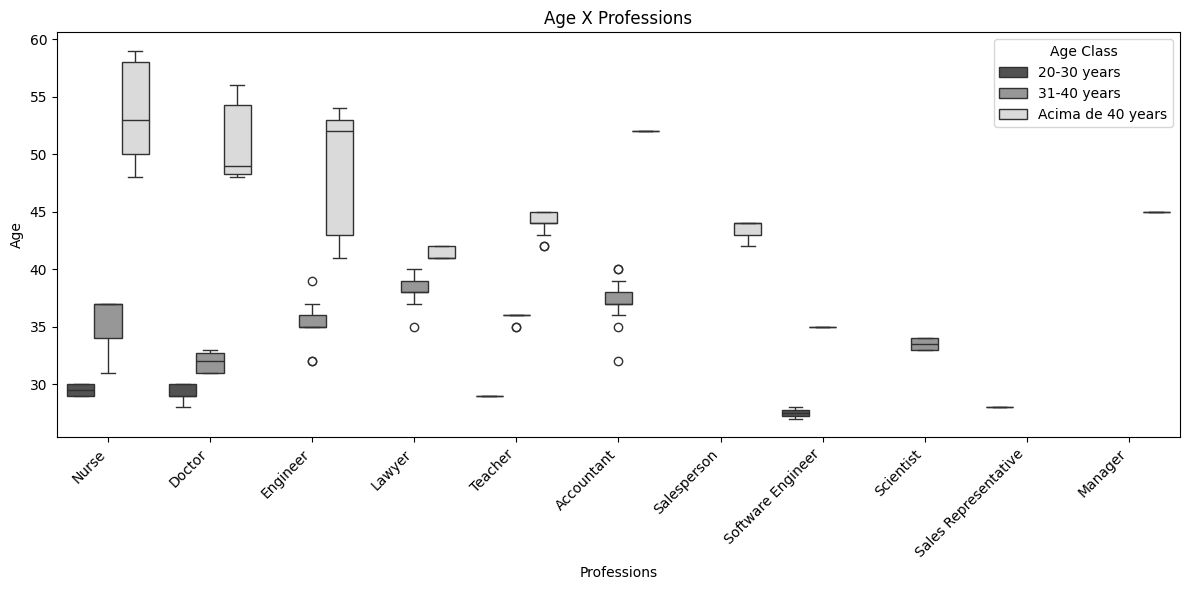

In [74]:
count_pessoas_por_profissao = df_qtdOcupacao['Occupation'].value_counts()
profissoes_ordenadas = count_pessoas_por_profissao.index.tolist()

Class1 = df_qtdOcupacao[(df_qtdOcupacao['Age'] >= 20) & (df_qtdOcupacao['Age'] <= 30)]
Class2 = df_qtdOcupacao[(df_qtdOcupacao['Age'] > 30) & (df_qtdOcupacao['Age'] <= 40)]
Class3 = df_qtdOcupacao[df_qtdOcupacao['Age'] > 40]


def assign_age_group(age):
    if age >= 20 and age <= 30:
        return '20-30 years'
    elif age > 30 and age <= 40:
        return '31-40 years'
    else:
        return 'Acima de 40 years'

df_qtdOcupacao['Age Class'] = df_qtdOcupacao['Age'].apply(assign_age_group)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Age', hue='Age Class', data=df_qtdOcupacao, order=profissoes_ordenadas,  palette='Greys_r')
plt.title('Age X Professions')
plt.xlabel('Professions')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Class', loc='upper right')
plt.tight_layout()

plt.show()

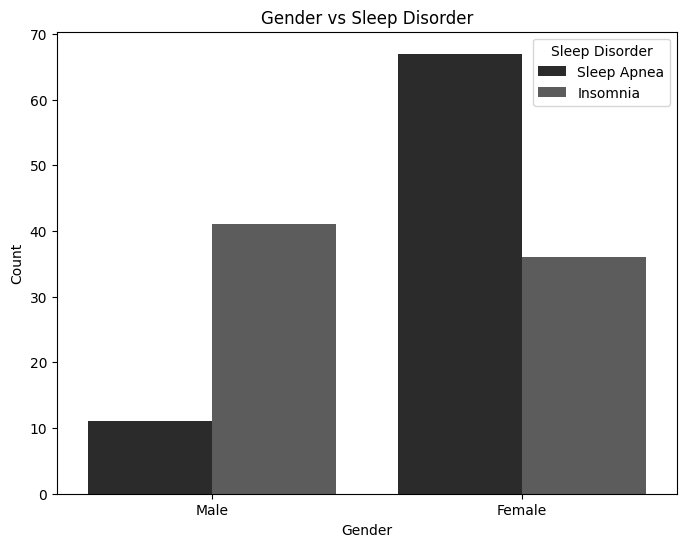

In [56]:
sns.set_palette('Greys_r')

plt.figure(figsize=(8, 6))
sns.countplot(data=df_qtdOcupacao, x='Gender', hue='Sleep Disorder')
plt.title('Gender vs Sleep Disorder')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')
plt.show()

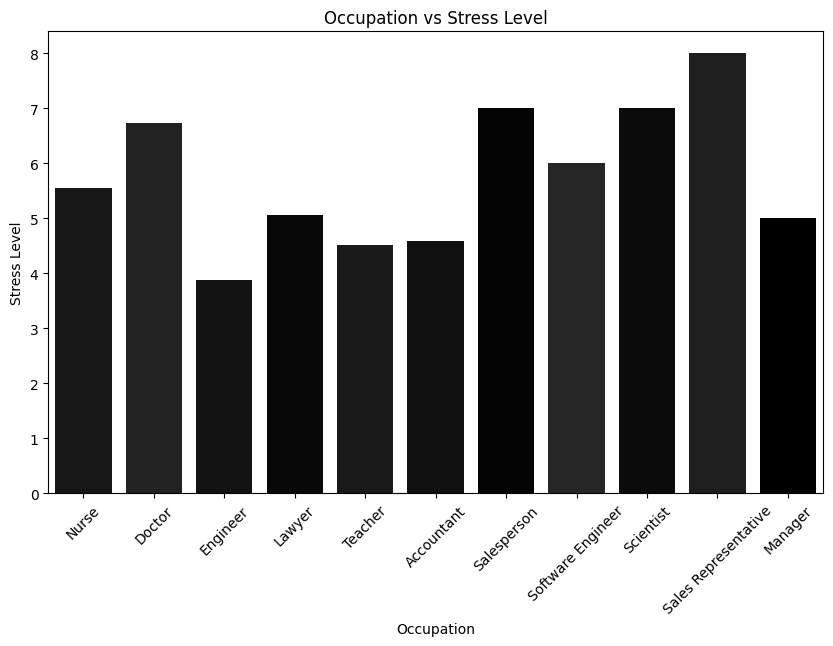

In [98]:
count_pessoas_por_profissao = df_qtdOcupacao['Occupation'].value_counts()
profissoes_ordenadas = count_pessoas_por_profissao.index.tolist() 
plt.figure(figsize=(10, 6))
sns.barplot(data=df_qtdOcupacao, x='Occupation', y='Stress Level', order=profissoes_ordenadas, hue='Occupation',palette='dark:black',errorbar=None, legend=False)
plt.title('Occupation vs Stress Level')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)
plt.show()

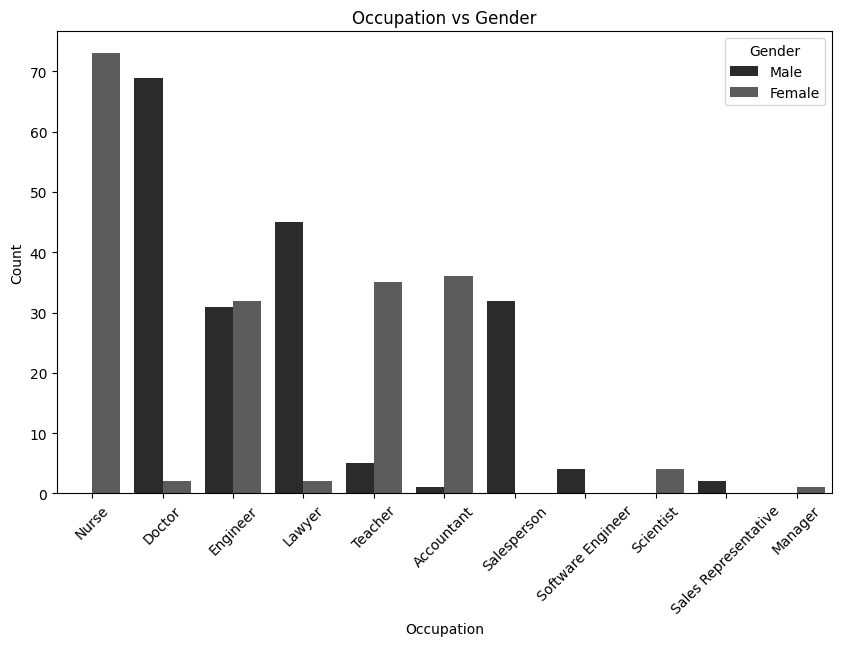

In [102]:
count_pessoas_por_profissao = df_qtdOcupacao['Occupation'].value_counts()
profissoes_ordenadas = count_pessoas_por_profissao.index.tolist() 
sns.set_palette('Greys_r')

plt.figure(figsize=(10, 6))
sns.countplot(data=df_qtdOcupacao, x='Occupation', hue='Gender', order=profissoes_ordenadas)
plt.title('Occupation vs Gender')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)
plt.show()